<a href="https://colab.research.google.com/github/Paulofilho08/data-science-portfolio/blob/main/Ativa%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Função de Ativação**

In [2]:
import torch
from torch import nn

0


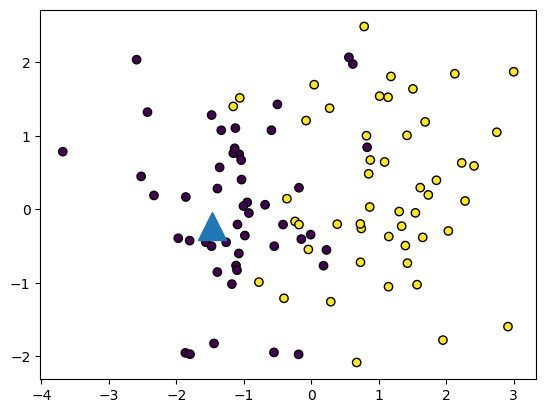

In [3]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')

p = X[10]
print(Y[10])
plt.plot(p[0], p[1], marker='^', markersize=20)

-2.8


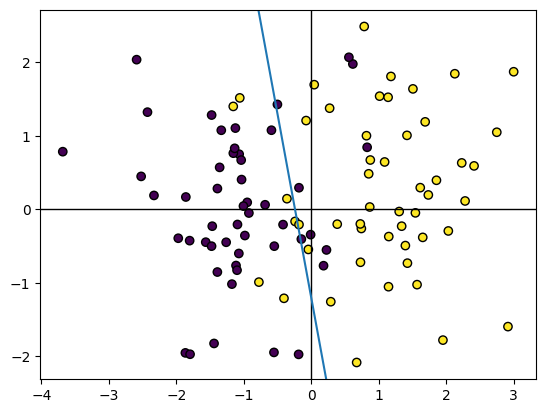

In [28]:
def plotmodel(w1, w2, b):

  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')

  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()

  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

w1 = 5 #a
w2 = 1  #b
b  = 1.2  #c
plotmodel(w1, w2, b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)

In [29]:
perceptron = nn.Linear(2, 1)
sigmoide = nn.Sigmoid()

print(perceptron.weight)
print(perceptron.bias)

perceptron.weight = nn.Parameter(torch.tensor([[w1, w2]], dtype=torch.float))
perceptron.bias = nn.Parameter(torch.tensor([b], dtype=torch.float))

print(perceptron.weight)
print(perceptron.bias)

Parameter containing:
tensor([[0.0410, 0.6930]], requires_grad=True)
Parameter containing:
tensor([-0.5271], requires_grad=True)
Parameter containing:
tensor([[5., 1.]], requires_grad=True)
Parameter containing:
tensor([1.2000], requires_grad=True)


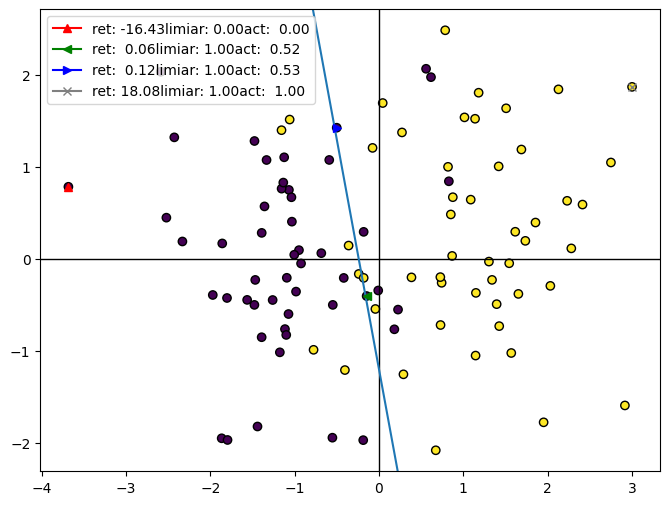

In [30]:
markers = ['^', '<', '>', 'x']
colors = ['r', 'g', 'b', 'gray']

plt.figure(figsize=(8, 6))
plotmodel(w1, w2, b)
for k, idx in enumerate([17, 21, 43, 66]):
  x = torch.Tensor(X[idx])
  ret = perceptron(x)
  act = sigmoide(ret)

  act_limiar = 0 if ret.data < 0 else 1

  label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + 'limiar: {:4.2f}'.format(act_limiar) + 'act: {:5.2f}'.format(act.data.numpy()[0])
  plt.plot(x[0], x[1], marker=markers[k], color=colors[k], label=label)
  plt.legend()